##CNN for classification on Fashion Mnist dataset


In [46]:
import keras

In [47]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout

In [55]:
import tensorflow as tf
import numpy as np

In [60]:
# fixing the random state of nupmy and tf
tf.random.set_seed(254)
np.random.seed(254)

In [61]:
# fetching the data
data=tf.keras.datasets.fashion_mnist

In [62]:
# loading the data in train and test variables
(train_img,train_lbl),(test_img,test_lbl)=data.load_data()

In [63]:
len(train_img) , len(test_img) # size of train and test data 

(60000, 10000)

In [64]:
train_img.shape

(60000, 28, 28)

In [65]:
train_img=train_img.reshape(60000,28,28,1)# addding channel to work with CNN
train_img=train_img/255.0 # scaling for normalisation

In [66]:
test_img=test_img.reshape(10000,28,28,1)
test_img=test_img/255.0

##Visualising the dataset

In [67]:
from matplotlib import pyplot as plt

In [68]:
# classes in fashion_mnist
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

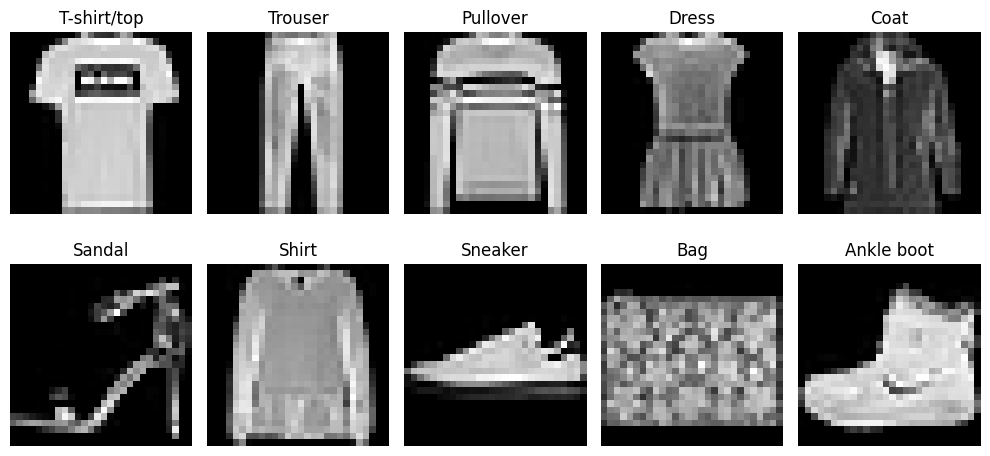

In [75]:
# matplotlib figure setup
fig,axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
axes = axes.flatten()

# Looping through each class for visualising the class
for i in range(len(class_names)):
    image = train_img[train_lbl == i][0]# Getting the first image belonging to the current class
    axes[i].set_title(class_names[i])# setting class titles
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')

# show the plot for classes
plt.tight_layout()
plt.show()

### Building the model

In [86]:
model=Sequential()

In [88]:
model.add(Conv2D(64,kernel_size=5,padding='same',activation='relu',input_shape=[28,28,1]))

In [89]:
model.add(Conv2D(128,kernel_size=3,padding='same',activation='relu')) 
model.add(Conv2D(128,kernel_size=3,padding='same',activation='relu')) 

In [90]:
model.add(MaxPool2D(pool_size=2))

In [91]:
model.add(Conv2D(256,kernel_size=3,padding='same',activation='relu')) 
model.add(Conv2D(256,kernel_size=3,padding='same',activation='relu')) 

In [92]:
model.add(MaxPool2D(pool_size=2))

In [93]:
#flatten to work with dense network
model.add(Flatten())

In [94]:
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax')) #output

In [100]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 256)       295168    
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 256)       590080    
                                                      

In [99]:
# Model Compilation
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(),metrics=[keras.metrics.categorical_accuracy])

In [101]:
#training the model
history=model.fit(train_img,train_lbl,epochs=10,validation_data=(test_img,test_lbl))

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.7975 - categorical_accuracy: 0.0985 - val_loss: 0.4902 - val_categorical_accuracy: 0.1092
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4363 - categorical_accuracy: 0.1059 - val_loss: 0.4368 - val_categorical_accuracy: 0.0855
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3668 - categorical_accuracy: 0.1050 - val_loss: 0.3734 - val_categorical_accuracy: 0.0849
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3261 - categorical_accuracy: 0.1036 - val_loss: 0.3413 - val_categorical_accuracy: 0.1133
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2962 - categorical_accuracy: 0.1031 - val_loss: 0.3112 - val_categorical_accuracy: 0.1165
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2723 - categorical_accuracy: 0.1024 - val_loss: 0.3087 - val_categoric

In [102]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

In [104]:
history.history['categorical_accuracy']

[0.0984666645526886,
 0.10591666400432587,
 0.10503333061933517,
 0.10360000282526016,
 0.10311666876077652,
 0.10243333131074905,
 0.1023000031709671,
 0.10188333690166473,
 0.1014999970793724,
 0.10083333402872086]

# using a random instances for prediction

In [111]:
print(np.argmax(model.predict(train_img[29].reshape(1,28,28,1))))

1/1 [==============================] - 0s 18ms/step
4


In [110]:
class_names[train_lbl[29]]

'Coat'

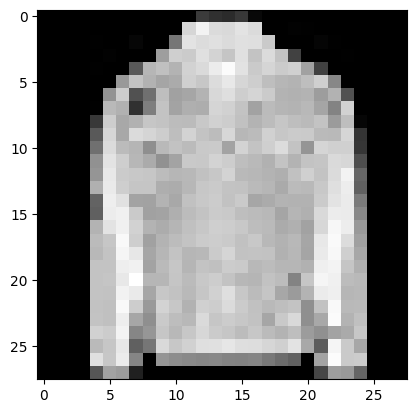

In [113]:
plt.imshow(train_img[29],cmap='gray')